# Project – Predictive Analysis using scikit-learn

#### Your assignment is to:

• Start with the mushroom data in the pandas DataFrame that you constructed in your “Assignment – Preprocessing Data with sci-kit learn.”

• Use scikit-learn to determine which of the two predictor columns that you selected (odor and one other column of your choice) most accurately predicts whether or not a mushroom is poisonous. There is an additional challenge here—to use scikit-learn’s predictive classifiers, you’ll want to convert each of your two (numeric categorical) predictor columns into a set of columns. See for one approach pandas get_dummies() method.

• Clearly state your conclusions along with any recommendations for further analysis.

In [378]:
import sklearn
import sklearn.preprocessing
import sklearn.linear_model
import sklearn.model_selection
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [379]:
columnNames = [
    'edible',
    'cap-shape',
    'cap-surface',
    'cap-color',
    'bruises', 
    'odor',
    'gill-attachment',
    'gill-spacing',
    'gill-size', 
    'gill-color', 
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-surface-below-ring', 
    'stalk-color-above-ring',
    'stalk-color-below-ring',
    'veil-type','veil-color', 
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'
    ]

originalData = pd.read_csv('agaricus-lepiota.data', names=columnNames)
originalData.head()

,edible,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [380]:
linear = sklearn.linear_model.LinearRegression()

In [381]:
binaryNormal = pd.get_dummies(originalData)
binaryNormal.head()

,edible_e,edible_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [382]:
edible = binaryNormal.iloc[:, 0:2]
edible.head()

,edible_e,edible_p
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [383]:
attributes = binaryNormal.iloc[:, 2:8]
attributes.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x
0,0,0,0,0,0,1
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,0,0,0,1
4,0,0,0,0,0,1


In [392]:
(attributesTrain, 
 attributesTest, 
 edibleTrain, 
 edibleTest) = sklearn.model_selection.train_test_split( 
    attributes,
    edible)

In [393]:
trainResults = linear.fit(mushroomAttributesTrain, mushroomClassTrain)

learnResults = linear.predict(mushroomAttributesTest)

In [394]:
columnNames = ['Predicted: Edible', 'Predicted: Poisonous']

predictedData = pandas.DataFrame(learningResults, columns=columnNames)
predictedData['Actual Value: Edible'] = mushroomClassTest['edible_e'].values
predictedData['Actual Value: Poisonous'] = mushroomClassTest['edible_p'].values

display(predictedData.head())

,Predicted: Edible,Predicted: Poisonous,Actual Value: Edible,Actual Value: Poisonous
0,1.000000e+00,1.110223e-16,1,0
1,-1.554312e-15,1.000000e+00,0,1
2,1.776357e-15,1.000000e+00,0,1
3,1.000000e+00,1.387779e-16,1,0
4,-1.110223e-15,1.000000e+00,0,1


In [395]:
#display(learningDataStructured.round(0).head())

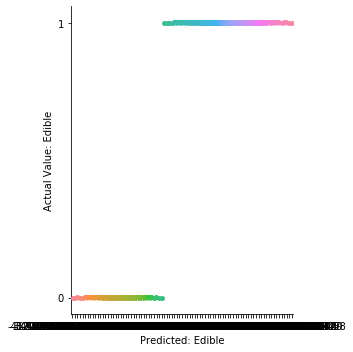

In [396]:
sns.catplot(x="Predicted: Edible", 
            y="Actual Value: Edible", 
            data=predictedData).set(yticks=(0,1));

### Conclusion

#### Lookin at the predicted and actual values, the attributes(cap shape) of a mushroom can predict if  a mushroom will be edible or not.  Taking in to account all of the attributes of the musshroom would give better data.  